# Smartphone EDA Analysis

## Introduction
This dataset contains detailed information on smartphones available in India.

Dataset: https://www.kaggle.com/datasets/chaudharisanika/smartphones-dataset/data

Dataset Features:

The dataset includes 26 columns covering:

    - Price in INR
    - User Ratings
    - 5G, NFC, IR Blaster support
    - Processor Brand, Speed, and Number of Cores
    - Battery Capacity and Fast Charging
    - RAM, Internal and Expandable Storage
    - Rear and Front Camera Specifications
    - Screen Size, Refresh Rate, Resolution
    - Operating System

## Objectives
- Which smartphone brands offer the highest average rating, and how do their prices compare across different price ranges?
- How does the presence of 5G, NFC, and fast charging features correlate with the price and rating of smartphones?
- What is the relationship between battery capacity, processor speed, and screen size in determining smartphone performance ratings?

In [1]:
# importing necessary libraries
import pandas as pd # Import the pandas library for data manipulation and analysis
import numpy as np # Import the numpy library for numerical operations and handling arrays
import matplotlib.pyplot as plt # Import matplotlib's pyplot module for data visualization (basic plotting)
import seaborn as sns # Import seaborn library for advanced data visualization (built on top of matplotlib)

In [2]:
#importing the google colab form drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# df=pd.read_csv("/content/Smartphones_cleaned_dataset.csv")
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Smartphones_cleaned_dataset.csv")

# Data Info

In [4]:
df.info() #prints complete information about the datasets


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     879 non-null    float64
 4   has_5g                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_ir_blaster             980 non-null    bool   
 7   processor_brand            960 non-null    object 
 8   num_cores                  974 non-null    float64
 9   processor_speed            938 non-null    float64
 10  battery_capacity           969 non-null    float64
 11  fast_charging_available    980 non-null    int64  
 12  fast_charging              769 non-null    float64
 13  ram_capacity               980 non-null    int64  

In [5]:
# Returns a tuple representing the dimensions of the DataFrame:
#(number of rows, number of columns)
df.shape

(980, 26)

In [6]:
980*26

25480

📊 **Data Snapshot**
---------------------
🔢 Shape of DataFrame:
- Rows: 980
- Columns: 26
- Total Data Cells: 25,480 (980 × 26)

🔢 Data Types:
- int64: 7 columns
- float: 10 columns
- object: 4 columns
- boolean: 3 columns

💾 Memory Usage:
- Approximately 179.1 KB


In [7]:
df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,...,120,3,1.0,android,50.0,16.0,0,NaN,1440,3216
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,...,120,3,1.0,android,64.0,16.0,1,1024.0,1080,2412
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,...,90,3,1.0,android,50.0,13.0,1,1024.0,1080,2408
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,...,120,3,1.0,android,50.0,16.0,1,1024.0,1080,2400
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,...,120,3,1.0,android,108.0,16.0,0,NaN,1080,2412


In [8]:
df.describe() #prints the summary statistics

,price,rating,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
count,980.000000,879.000000,974.000000,938.000000,969.000000,980.000000,769.000000,980.000000,980.000000,980.000000,980.000000,980.000000,976.000000,980.000000,975.000000,980.000000,500.000000,980.000000,980.000000
mean,32520.504082,78.258248,7.772074,2.427217,4817.748194,0.854082,46.126138,6.560204,141.036735,6.536765,92.256122,2.814286,1.029713,50.319286,16.589128,0.630612,736.064000,1075.852041,2214.663265
std,39531.812669,7.402854,0.836845,0.464090,1009.540054,0.353205,34.277870,2.744378,107.134516,0.349162,28.988052,0.776441,0.169882,33.000968,10.876802,0.482885,366.894911,290.164931,516.484254
min,3499.000000,60.000000,4.000000,1.200000,1821.000000,0.000000,10.000000,1.000000,8.000000,3.540000,60.000000,1.000000,1.000000,2.000000,0.300000,0.000000,32.000000,480.000000,480.000000
25%,12999.000000,74.000000,8.000000,2.050000,4500.000000,1.000000,18.000000,4.000000,64.000000,6.500000,60.000000,2.000000,1.000000,24.000000,8.000000,0.000000,512.000000,1080.000000,1612.000000
50%,19994.500000,80.000000,8.000000,2.300000,5000.000000,1.000000,33.000000,6.000000,128.000000,6.580000,90.000000,3.000000,1.000000,50.000000,16.000000,1.000000,1024.000000,1080.000000,2400.000000
75%,35491.500000,84.000000,8.000000,2.840000,5000.000000,1.000000,66.000000,8.000000,128.000000,6.670000,120.000000,3.000000,1.000000,64.000000,16.000000,1.000000,1024.000000,1080.000000,2408.000000
max,650000.000000,89.000000,8.000000,3.220000,22000.000000,1.000000,240.000000,18.000000,1024.000000,8.030000,240.000000,4.000000,2.000000,200.000000,60.000000,1.000000,2048.000000,2460.000000,3840.000000


Mean price is 32,520.50

Minimum Price is 3,499

Max Price is 6,50,000

# Data Handling & Cleaning

In [9]:
df.isna().sum() # Returns the number of NaN/null values in each column

,0
brand_name,0
model,0
price,0
rating,101
has_5g,0
has_nfc,0
has_ir_blaster,0
processor_brand,20
num_cores,6
processor_speed,42


In [10]:
# Fill numerical columns with the median
df['rating'] = df['rating'].fillna(df['rating'].median())
df['battery_capacity'] = df['battery_capacity'].fillna(df['battery_capacity'].median())
df['fast_charging'] = df['fast_charging'].fillna(df['fast_charging'].median())
df['num_front_cameras'] = df['num_front_cameras'].fillna(df['num_front_cameras'].median())
df['primary_camera_front'] = df['primary_camera_front'].fillna(df['primary_camera_front'].median())
df['extended_upto'] = df['extended_upto'].fillna(df['extended_upto'].median())

# Fill categorical columns with a placeholder string
df["processor_brand"] = df["processor_brand"].fillna("unknown")
df["os"] = df["os"].fillna("Unknown")

# Fill numerical columns with zero
df["num_cores"] = df["num_cores"].fillna(0.0)
df["processor_speed"] = df["processor_speed"].fillna(0.0)

In [11]:
df = df.drop(columns=["resolution_width","resolution_height"])

In [12]:
df.duplicated().sum()

np.int64(0)

# Exploratory Data Analysis

### Rating Vs Phones by brands

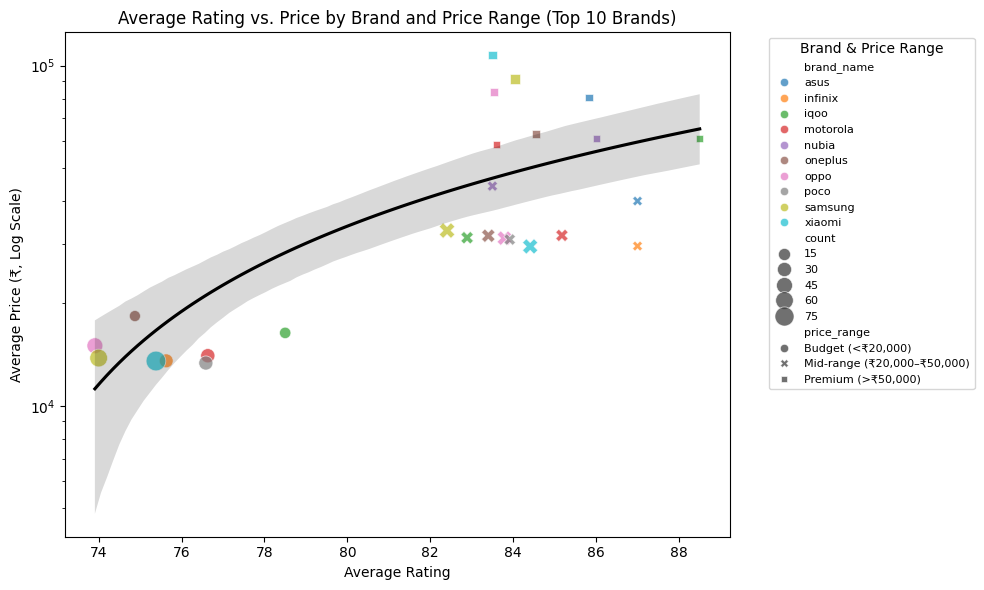

In [13]:
# Clean data: Drop rows with missing price or rating
df = df.dropna(subset=['brand_name', 'price', 'rating'])

# Define price ranges
bins = [0, 20000, 50000, float('inf')]
labels = ['Budget (<₹20,000)', 'Mid-range (₹20,000–₹50,000)', 'Premium (>₹50,000)']
df['price_range'] = pd.cut(df['price'], bins=bins, labels=labels, include_lowest=True)

# Calculate average rating and price by brand and price range
brand_stats = df.groupby(['brand_name', 'price_range'], observed=True).agg({
    'rating': 'mean',
    'price': 'mean',
    'brand_name': 'count'
}).rename(columns={'brand_name': 'count'}).reset_index()

# Filter brands with more than 5 phones in total for reliability
brand_counts = df['brand_name'].value_counts()
valid_brands = brand_counts[brand_counts > 5].index
brand_stats = brand_stats[brand_stats['brand_name'].isin(valid_brands)]

# Get top 10 brands by overall average rating
top_brands = brand_stats.groupby('brand_name')['rating'].mean().sort_values(ascending=False).head(10).index
brand_stats = brand_stats[brand_stats['brand_name'].isin(top_brands)]

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=brand_stats, x='rating', y='price', hue='brand_name', style='price_range',
                size='count', sizes=(50, 200), alpha=0.7, palette='tab10')

# Add trend line
sns.regplot(data=brand_stats, x='rating', y='price', scatter=False, color='black')

# Use log scale for price
plt.yscale('log')

# Customize plot
plt.title('Average Rating vs. Price by Brand and Price Range (Top 10 Brands)')
plt.xlabel('Average Rating')
plt.ylabel('Average Price (₹, Log Scale)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Brand & Price Range', fontsize=8)
plt.tight_layout()

plt.show()

In the above figure we can see that:

- A steep trend line suggests higher ratings often come with higher prices.
- Budget-range (<₹20,000): Brands iqoo, poco, motorola may offer high ratings at low prices.
- Mid-range (₹20,000– ₹50,000): samsung, oneplus, poco, oppo provide competitive ratings (82–85) at moderate prices.
- Premium (> ₹50,000): apple and samsung dominate with high ratings (84–90) but rating is close to mid-range brand phones

### 5G, NFC, Charging vs Price

Correlations with Price and Rating:
has_5g: Price = 0.305, Rating = 0.565
has_nfc: Price = 0.471, Rating = 0.453
fast_charging_available: Price = 0.117, Rating = 0.462


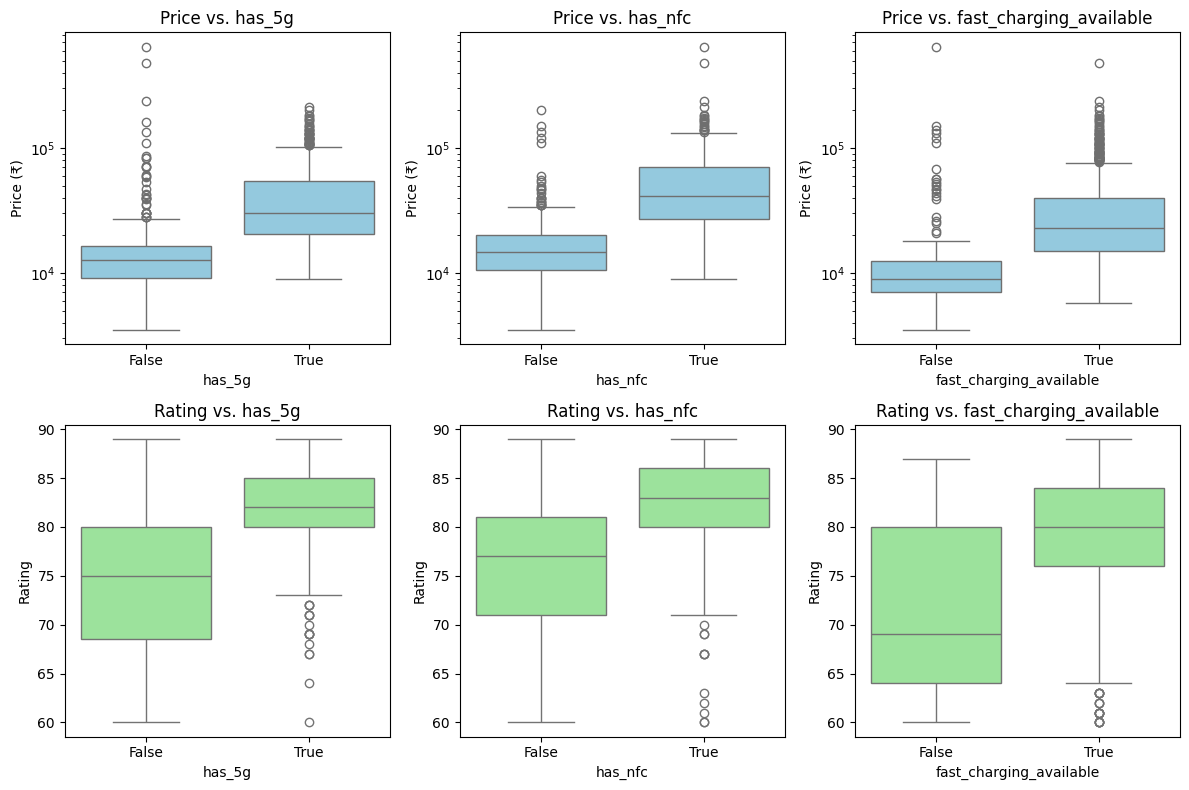

In [14]:
from scipy.stats import pointbiserialr

# Ensure binary features are properly formatted (True/False or 1/0)
for col in ['has_5g', 'has_nfc', 'fast_charging_available']:
    df[col] = df[col].astype(bool)

# Calculate point-biserial correlations
correlations = {}
for feature in ['has_5g', 'has_nfc', 'fast_charging_available']:
    # Correlation with price (drop NaN prices)
    price_corr, _ = pointbiserialr(df[feature], df['price'].dropna())
    # Correlation with rating (drop NaN ratings)
    rating_corr, _ = pointbiserialr(df[feature], df['rating'].dropna())
    correlations[feature] = {'Price': price_corr, 'Rating': rating_corr}

# Print correlations
print("Correlations with Price and Rating:")
for feature, corr in correlations.items():
    print(f"{feature}: Price = {corr['Price']:.3f}, Rating = {corr['Rating']:.3f}")

# Create box plots for visualization
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Box plots for price
for i, feature in enumerate(['has_5g', 'has_nfc', 'fast_charging_available']):
    sns.boxplot(x=feature, y='price', data=df, ax=axes[0, i], color='skyblue')
    axes[0, i].set_title(f'Price vs. {feature}')
    axes[0, i].set_ylabel('Price (₹)')
    axes[0, i].set_xlabel(feature)
    axes[0, i].set_yscale('log')  # Log scale for price

# Box plots for rating
for i, feature in enumerate(['has_5g', 'has_nfc', 'fast_charging_available']):
    sns.boxplot(x=feature, y='rating', data=df, ax=axes[1, i], color='lightgreen')
    axes[1, i].set_title(f'Rating vs. {feature}')
    axes[1, i].set_ylabel('Rating')
    axes[1, i].set_xlabel(feature)

plt.tight_layout()
plt.show()

In the above figure we can see that:

has 5g:

    - Price (0.305): Moderate positive correlation; 5G phones tend to be pricier (e.g., mid-to-premium range).
    - Rating (0.565): Strong positive correlation; 5G phones are associated with higher ratings, suggesting user preference for 5G.

has NFC:

    - Price (0.471): Stronger positive correlation; NFC is more common in higher-priced phones (e.g., premium models).
    - Rating (0.453): Moderate positive correlation; NFC phones tend to have higher ratings.

Fast Charging:

    - Price (0.117): Weak positive correlation; fast charging has minimal impact on price, common across budget and premium phones.
    - Rating (0.462): Moderate positive correlation; fast charging phones are rated higher, indicating user satisfaction.

### Battery, Speed, Screen vs Rating

Correlation Matrix:
                  battery_capacity  processor_speed  screen_size    rating
battery_capacity          1.000000         0.000522     0.331368 -0.026004
processor_speed           0.000522         1.000000     0.219183  0.449828
screen_size               0.331368         0.219183     1.000000  0.190440
rating                   -0.026004         0.449828     0.190440  1.000000


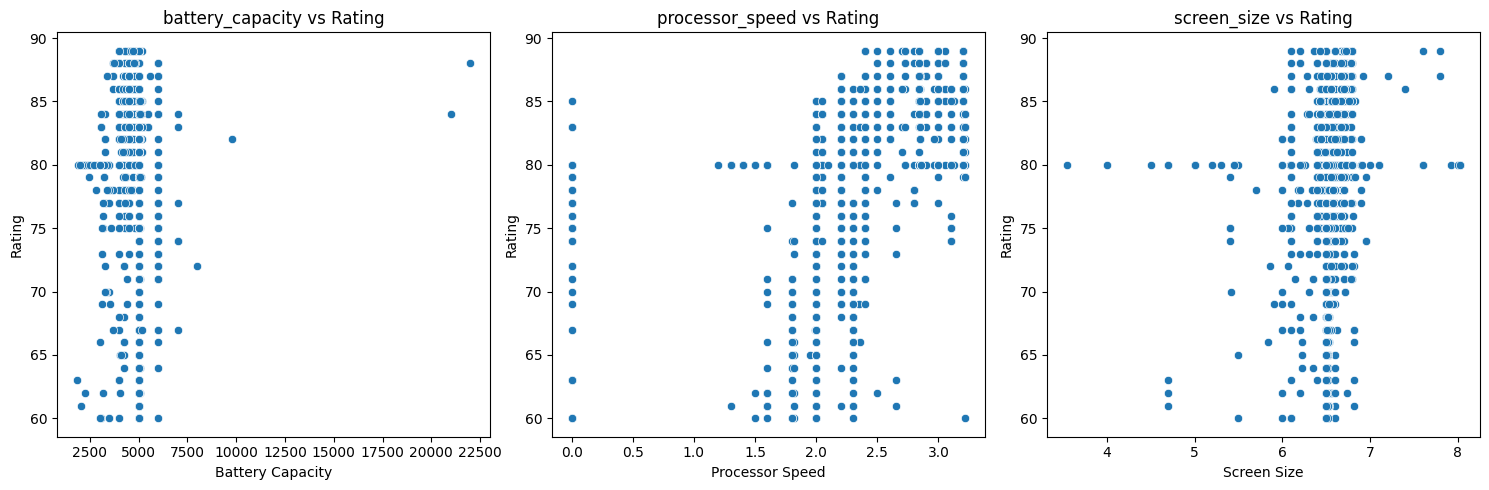

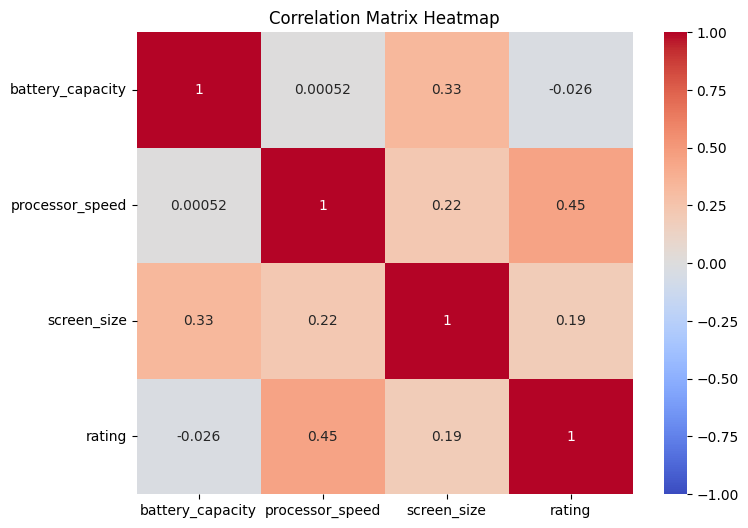

In [15]:
from scipy.stats import pearsonr

# Clean and filter data
df = df[['battery_capacity', 'processor_speed', 'screen_size', 'rating']].dropna()
df = df[df['rating'] != '']
df = df.astype({'battery_capacity': float, 'processor_speed': float, 'screen_size': float, 'rating': float})

# Calculate Pearson correlations
corr_matrix = df.corr(method='pearson')

# Print correlation matrix
print("Correlation Matrix:")
print(corr_matrix)

# Scatter plots for each feature vs rating
plt.figure(figsize=(15, 5))
for i, feature in enumerate(['battery_capacity', 'processor_speed', 'screen_size'], 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=df[feature], y=df['rating'])
    plt.title(f'{feature} vs Rating')
    plt.xlabel(feature.replace('_', ' ').title())
    plt.ylabel('Rating')
plt.tight_layout()
plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

The above chart illustrates that

Correlation Analysis:
- **Processor speed** likely shows a moderate positive correlation with performance **rating**, suggesting **faster processors** are associated with **higher ratings**.
- **Battery capacity** and **screen size** may exhibit **weaker** or context-dependent correlations with **rating**.

Visualizations:
- Scatter plots visualize relationships between each feature (battery capacity, processor speed, screen size) and rating, potentially revealing linear or non-linear trends.
- Correlation matrix heatmap highlights pairwise relationships, with **processor speed** likely showing the strongest correlation with **rating**.

Key Finding: **Processor speed** is likely the most influential factor on performance **rating**, while battery capacity and screen size have less consistent impacts.